# 課題

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1-変数 fpsを用いて，【fps = 1 fps, 0.2 fps, 10 fps】でカメラから画像を表示する

In [102]:
fps = float(input("FPSを入力してください"))

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, img = cap.read()
    if ret is None: #読み込めなかったらerror
        print("capture error")
        break
        
    cv2.imshow(str(fps) + "FPS", img)
    
    wait_sec = int(1000//fps) #waitKeyの値、int型にしないとerror
    key = cv2.waitKey(wait_sec)
    
    if key == 27: #escで終了
        break
    
cap.release()
cv2.destroyAllWindows()

FPSを入力してください 0.2


## 2-(1fps)でカメラ画像，グレー画像をそれぞれ保存する

In [93]:
cap = cv2.VideoCapture(0)
count = 0

while cap.isOpened():
    count += 1
    ret, img = cap.read()
    if ret is None: #読み込めなかったらerror
        print("capture error")
        break
        
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray画像
    
    cv2.imwrite("cap_img\\" + str(count) + ".jpg", img)
    cv2.imwrite("cap_img\\" + str(count) + "g.jpg", img_gray) #保存
    
    key = cv2.waitKey(1000) #1fps
    
    if key == 27: #escで終了
        break
    
    if count >= 10: #10回撮ったら終了
        break
        
cap.release()
cv2.destroyAllWindows()

## 3-(1fps)で平滑化画像，グレー画像，二値化画像を表示する

In [94]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret1, img = cap.read()
    
    if ret1 is None:
        print("capture error")
        break
        
    img_blur = cv2.blur(img, (5, 5)) #ぼかし
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray画像
    ret2, img_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY_INV) #二値化
    
    cv2.imshow("blur_img", img_blur)
    cv2.imshow("gray_img", img_gray)
    cv2.imshow("thresh_img", img_thresh)
    
    key = cv2.waitKey(1000) #1fps
    
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

## 4-(1fps)でカメラから好きなものを検出した画像を表示する(赤い四角で囲む)

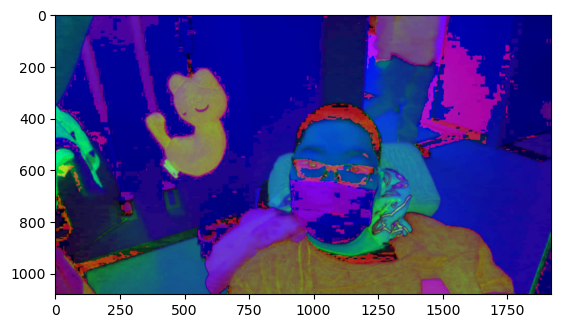

In [95]:
img = cv2.imread("detect\\toy1.jpg")

img_blur = cv2.blur(img, (5, 5))
img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)

plt.imshow(img_hsv)

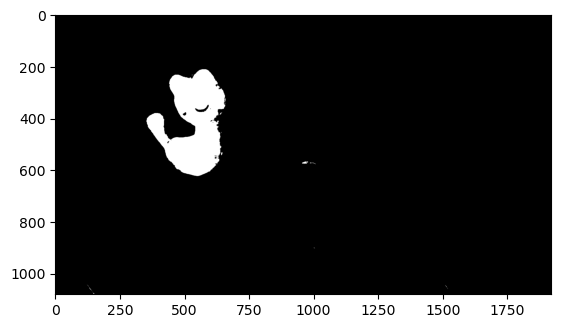

In [96]:
h1, s1, v1 = img_hsv[300, 600]

lower_range1 = np.array([h1-5, s1-50, v1-70])
upper_range1 = np.array([h1+5, s1+50, v1+70]) #範囲指定

img_range1 = cv2.inRange(img_hsv, lower_range1, upper_range1)
plt.imshow(img_range1, "gray")

In [97]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret1, img = cap.read()
    if ret1 is None:
        print("capture error")
        break
        
    img_blur = cv2.blur(img, (5, 5))
    img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
    
    img_range = cv2.inRange(img_hsv, lower_range1, upper_range1) #上の範囲を使う
    
    rect_ker = np.ones((3, 3))
    #膨張収縮3回ずつ
    img_dilate = cv2.dilate(img_range, rect_ker, iterations=3) 
    img_erode = cv2.erode(img_dilate, rect_ker, iterations=3)
    
    contours, hier = cv2.findContours(img_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for each_contour in contours:
        x, y, w, h = cv2.boundingRect(each_contour)
        
        if (w * h >= 1000): #面積1000以上で検出
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)
        
    cv2.imshow("toy", img)
    
    key = cv2.waitKey(100) #10fps
    
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

## 5-(10fps)でカメラから手のひらを検出した画像を表示する

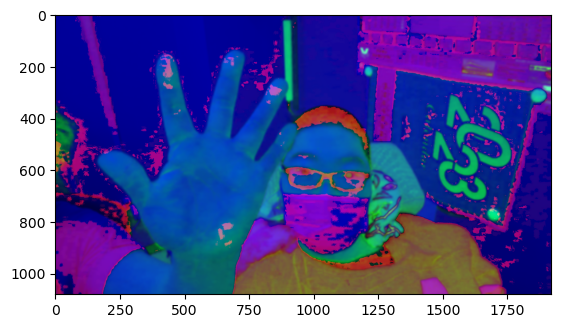

In [98]:
img = cv2.imread("detect\\hand1.jpg")

img_blur = cv2.blur(img, (9, 9))
img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)

plt.imshow(img_hsv)

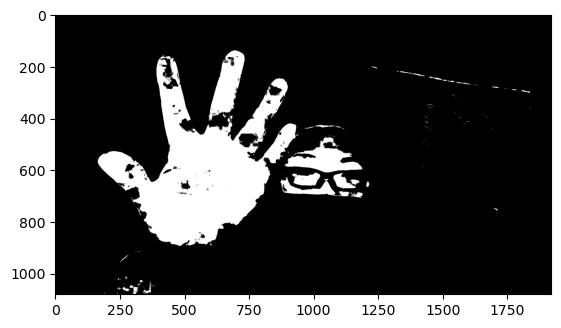

In [99]:
h2, s2, v2 = img_hsv[500, 500]

lower_range2 = np.array([h2-5, s2-30, v2-50])
upper_range2 = np.array([h2+5, s2+30, v2+50])

img_range2 = cv2.inRange(img_hsv, lower_range2, upper_range2)
plt.imshow(img_range2, "gray")

In [100]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret1, img = cap.read()
    if ret1 is None:
        print("capture error")
        break
        
    img_blur = cv2.blur(img, (5, 5))
    img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
    
    img_range = cv2.inRange(img_hsv, lower_range2, upper_range2)
    
    rect_ker = np.ones((3, 3))
    #先に膨張すると腕部分を誤認識するので、先に収縮する
    img_erode = cv2.erode(img_range, rect_ker, iterations=3)
    img_dilate = cv2.dilate(img_erode, rect_ker, iterations=3)
    contours, hier = cv2.findContours(img_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for each_contour in contours:
        x, y, w, h = cv2.boundingRect(each_contour)
        
        if (w * h >= 3000): #面積3000以上で検出
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)
        
    cv2.imshow("hand", img)
    
    key = cv2.waitKey(100) #10fps
    
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

## 6-(10fps)でカメラから flip した画像をそれぞれ表示する（Origin, 1, -1, 0）

In [101]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, img = cap.read()
    
    if ret is None:
        print("capture error")
        break
    
    img_flip_left_right = cv2.flip(img, 1) #左右反転
    img_flip_up_down = cv2.flip(img, -1) #上下反転
    img_flip_all = cv2.flip(img, 0) #上下左右反転
    
    cv2.imshow("origin", img)
    cv2.imshow("left_right", img_flip_left_right)
    cv2.imshow("up_down", img_flip_up_down)
    cv2.imshow("all_flip", img_flip_all)
    
    key = cv2.waitKey(100) #10fps
    
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()